# Machine Learning 2 - Neural Networks

In this lab, we will use simple Neural Networks to classify the images from the simplified CIFAR-10 dataset. We will compare our results with those obtained with Decision Trees and Random Forests.

Lab objectives
----
* Classification with neural networks
* Influence of hidden layers and of the selected features on the classifier results

In [1]:
from lab_tools import CIFAR10, evaluate_classifier, get_hog_image
        
dataset = CIFAR10('CIFAR10/')

Pre-loading training data
Pre-loading test data


We will use the *[Multi-Layer Perceptron](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)* implementation from scikit-learn, which is only available since version 0.18. You can check which version of scikit-learn is installed by executing this :

In [2]:
import sklearn
print(sklearn.__version__)

1.3.0


If you have version 0.17 or older, please update your scikit-learn installation (for instance, with the command *pip install scikit-learn==0.19.1* in the terminal or Anaconda prompt)

## Build a simple neural network

* Using the [MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) from scikit-learn, create a neural network with a single hidden layer.
* Train this network on the CIFAR dataset.
* Using cross-validation, try to find the best possible parameters.

In [9]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()
clf.fit( dataset.train['hog'], dataset.train['labels'] )

/Users/silver22/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [10]:
from sklearn.metrics import accuracy_score

#Descriptive performances
pred_train = clf.predict(dataset.train['hog'])
score_train = accuracy_score(dataset.train['labels'], pred_train)
print("The accuracy on training set is:", score_train)

#Predictive performances
pred_test = clf.predict(dataset.test['hog'])
score_test = accuracy_score(dataset.test['labels'], pred_test)
print("The accuracy on test set is:", score_test)

The accuracy on training set is: 0.862
The accuracy on test set is: 0.7983333333333333


In [11]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(dataset.train['labels'], pred_train)
print(cm1)
cm2 = confusion_matrix(dataset.test['labels'], pred_test)
print(cm2)

[[4332  488  180]
 [ 418 4107  475]
 [ 103  406 4491]]
[[817 140  43]
 [124 735 141]
 [ 29 128 843]]


In [12]:
import seaborn as sns
from matplotlib import pyplot as plt

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlBu', xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

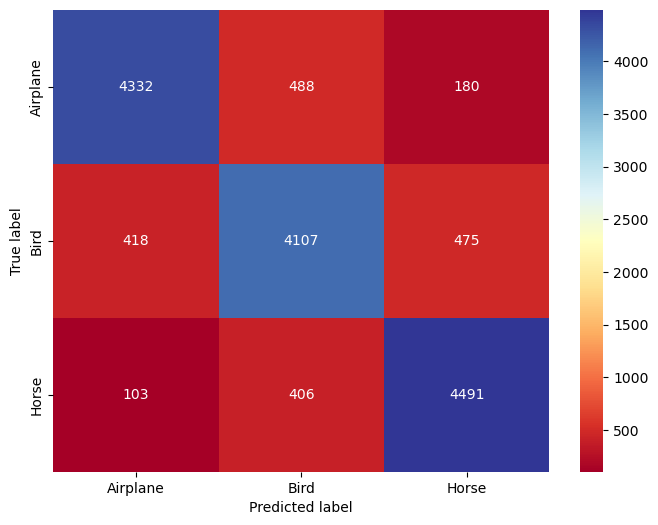

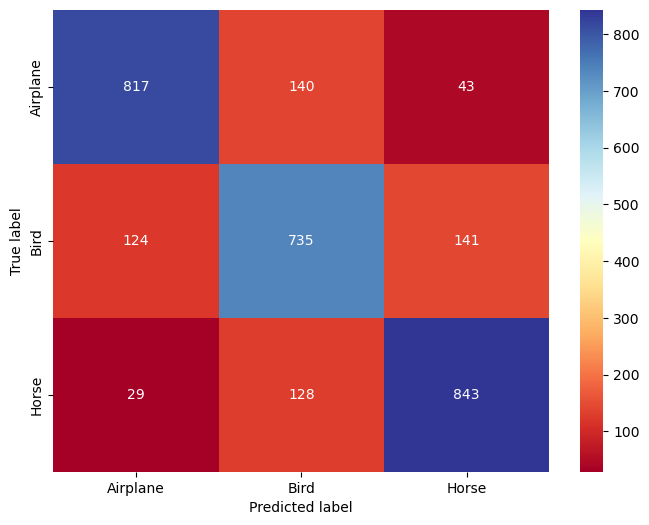

In [13]:
class_names = dataset.labels

plot_confusion_matrix(cm1, class_names)
plot_confusion_matrix(cm2, class_names)

In [5]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

kf = StratifiedKFold(5)

param_grid = {
    'hidden_layer_sizes': [(20,), (50,), (80,), (100,), (120,), (150,), (200,)],
    'activation': ['identity', 'logistic', 'tanh', 'relu']
}

grid_search = GridSearchCV(clf, param_grid, cv=kf, scoring='accuracy', verbose=1)
grid_search.fit(dataset.train['hog'], dataset.train['labels'])

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


/Users/silver22/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/silver22/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/silver22/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/silver22/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/silver22/anaconda

Best parameters found: {'activation': 'relu', 'hidden_layer_sizes': (200,)}
Best cross-validated score: 0.7966666666666666


/Users/silver22/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
clf_best = MLPClassifier(hidden_layer_sizes=(200,), activation = 'relu')
clf_best.fit( dataset.train['hog'], dataset.train['labels'] )

/Users/silver22/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(200,))

In [15]:
from sklearn.metrics import accuracy_score

#Descriptive performances
pred_train = clf_best.predict(dataset.train['hog'])
score_train = accuracy_score(dataset.train['labels'], pred_train)
print("The accuracy on training set is:", score_train)

#Predictive performances
pred_test = clf_best.predict(dataset.test['hog'])
score_test = accuracy_score(dataset.test['labels'], pred_test)
print("The accuracy on test set is:", score_test)

The accuracy on training set is: 0.9004666666666666
The accuracy on test set is: 0.813


In [16]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(dataset.train['labels'], pred_train)
print(cm1)
cm2 = confusion_matrix(dataset.test['labels'], pred_test)
print(cm2)

[[4577  297  126]
 [ 352 4321  327]
 [ 109  282 4609]]
[[845 116  39]
 [119 752 129]
 [ 38 120 842]]


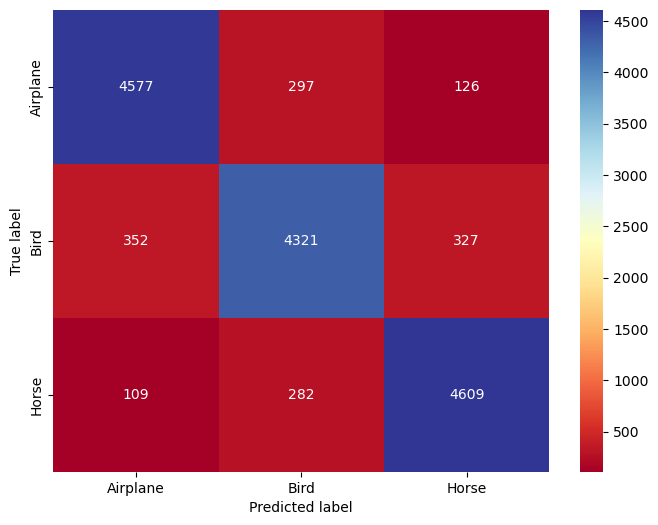

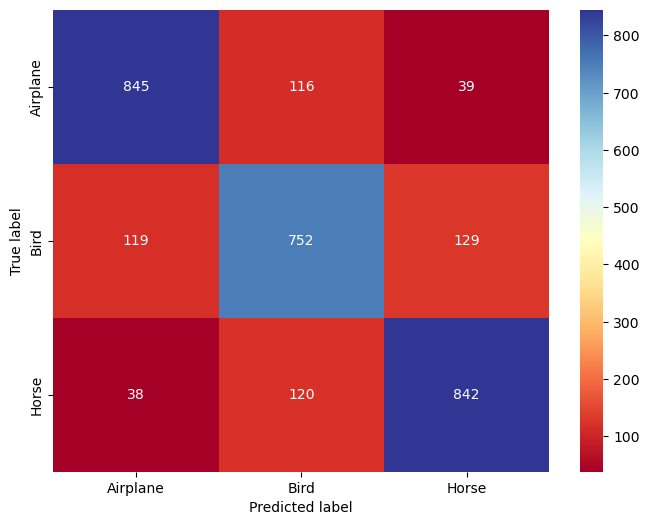

In [17]:
class_names = dataset.labels

plot_confusion_matrix(cm1, class_names)
plot_confusion_matrix(cm2, class_names)

## Add hidden layers to the network.

Try to change the structure of the network by adding hidden layers. Using cross-validation, try to find the best architecture for your network.

In [18]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(20,50,50), (100,50,20), (50,100,50),(200,50,20,20),(50,200,20,50),(100,50,20,100),
                           (50,50,50), (50,100,50)]
}

grid_search = GridSearchCV(clf, param_grid, cv=kf, scoring='accuracy', verbose=1)
grid_search.fit(dataset.train['hog'], dataset.train['labels'])

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Users/silver22/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/silver22/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/silver22/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/silver22/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/silver22/anaconda

Best parameters found: {'hidden_layer_sizes': (200, 50, 20, 20)}
Best cross-validated score: 0.7777333333333333


In [19]:
clf_new = MLPClassifier(alpha = 0.001, hidden_layer_sizes=(200,50,20,20))
clf_new.fit( dataset.train['hog'], dataset.train['labels'] )

MLPClassifier(alpha=0.001, hidden_layer_sizes=(200, 50, 20, 20))

In [20]:
from sklearn.metrics import accuracy_score

#Descriptive performances
pred_train = clf.predict(dataset.train['hog'])
score_train = accuracy_score(dataset.train['labels'], pred_train)
print("The accuracy on training set is:", score_train)

#Predictive performances
pred_test = clf.predict(dataset.test['hog'])
score_test = accuracy_score(dataset.test['labels'], pred_test)
print("The accuracy on test set is:", score_test)

The accuracy on training set is: 0.862
The accuracy on test set is: 0.7983333333333333
